In [1]:
import numpy as np
from numpy.random import seed,normal,uniform
from functools import partial
import matplotlib.pyplot as plt
import torch

In [5]:
def quadratic(a1,a2,a3,x):
    return a1*x**2+a2*x+a3

def quadratic_(a1,a2,a3):
    return partial(quadratic,a1,a2,a3)

def derivative(f,x,h):
    return (f(x + h) - f(x))/h

def plot_model(x,y):
    plt.plot(x,y)

In [3]:
print(quadratic(3,-5,2,1))
func = quadratic_(3,2,1)
func(1)

0


6

Derivatives


In [6]:
f = quadratic_(3,-4,0)
h = 0.1
derivative(f,1,h)


2.3000000000000043

Plotting

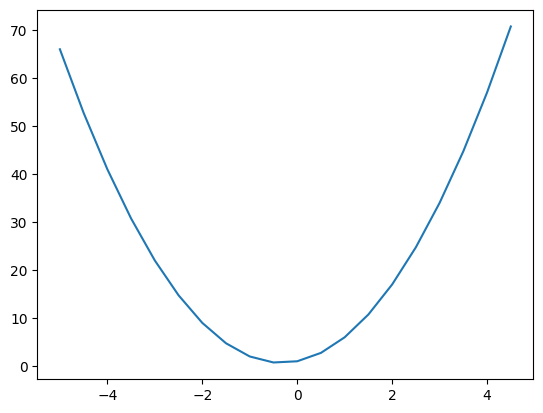

In [13]:
x = np.arange(-5,5,0.5)
y = func(x)
plot_model(x,y)

In [58]:
np.random.seed(37)
def noise(x,scale):
    return normal(scale=scale,size=x.shape)

def add_noise(x,a,b):
    return x *(1+noise(x,a))+noise(x,b)

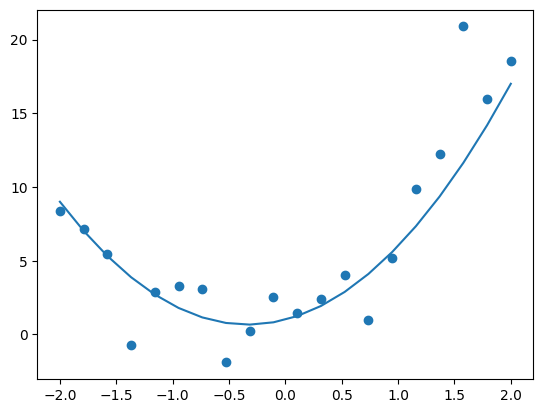

In [59]:
x = torch.linspace(-2,2,20)[:,None]
y = add_noise(func(x),0.3,1.5)
plt.scatter(x,y)
y_func = quadratic_(3,2,1) 
y_in = y_func(x)
plot_model(x,y_in)

In [60]:
def mse(pred,act):
    return ((pred-act)**2).mean()

def calc_mse(params):
    print(*params)
    fun = quadratic_(*params)
    return mse(fun(x),y)


In [61]:
param_list = torch.tensor([1.5,1.5,1.5])
param_list.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [41]:
# loss = calc_mse(param_list)
# print(loss)

tensor(1.5000, grad_fn=<UnbindBackward0>) tensor(1.5000, grad_fn=<UnbindBackward0>) tensor(1.5000, grad_fn=<UnbindBackward0>)
tensor(260.6746, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [63]:
epochs = 5

for i in range(epochs):
    loss = calc_mse(param_list)
    loss.backward()
    with torch.no_grad():
        param_list-=param_list.grad*0.01
    
    print("Epoch {}, loss = {}".format(i,loss))


tensor(4.6185, grad_fn=<UnbindBackward0>) tensor(3.4221, grad_fn=<UnbindBackward0>) tensor(2.3356, grad_fn=<UnbindBackward0>)
Epoch 0, loss = 17.43147997825407
tensor(4.5712, grad_fn=<UnbindBackward0>) tensor(3.6771, grad_fn=<UnbindBackward0>) tensor(2.2293, grad_fn=<UnbindBackward0>)
Epoch 1, loss = 16.56384323961165
tensor(4.3988, grad_fn=<UnbindBackward0>) tensor(3.9140, grad_fn=<UnbindBackward0>) tensor(2.0656, grad_fn=<UnbindBackward0>)
Epoch 2, loss = 14.207720206487329
tensor(4.1196, grad_fn=<UnbindBackward0>) tensor(4.1256, grad_fn=<UnbindBackward0>) tensor(1.8529, grad_fn=<UnbindBackward0>)
Epoch 3, loss = 11.30455053252856
tensor(3.7616, grad_fn=<UnbindBackward0>) tensor(4.3058, grad_fn=<UnbindBackward0>) tensor(1.6037, grad_fn=<UnbindBackward0>)
Epoch 4, loss = 9.01030257849008
